In [1]:
import transformer_lens
import torch
#import numpy as np 

c:\Users\durrc\OneDrive\Desktop\mech_interp_project\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
system_size=10

In [3]:
cfg = transformer_lens.HookedTransformerConfig(
    d_model=32,
    d_head = 8,
    n_layers=2,
    n_ctx=1+system_size,
    n_heads = 4,
    d_mlp = None,
    d_vocab=3,
    act_fn=None,
    attn_only=True,
    d_vocab_out=1
)

hooked_model = transformer_lens.HookedTransformer(
    cfg
)


In [4]:
def adapt_hooked_model(hooked_model):
    # give the hooked model params that are assumed to exist
    hooked_model.system_size = hooked_model.cfg.n_ctx-1
    hooked_model.system_sizes = [hooked_model.system_size]
    hooked_model.param_range = None
    hooked_model.embedding_size = hooked_model.cfg.d_model
    hooked_model.n_head = hooked_model.cfg.n_heads
    hooked_model.n_layers = hooked_model.cfg.n_layers
    hooked_model.size_idx=0
    


In [5]:
adapt_hooked_model(hooked_model)

In [6]:
from pruned_tqs.Hamiltonian import Ising
from pruned_tqs.optimizer import Optimizer

In [7]:
system_size = hooked_model.system_size

Hamiltonians = [Ising(system_size, periodic=False)]

param_dim = Hamiltonians[0].param_dim

c:\Users\durrc\OneDrive\Desktop\mech_interp_project\quantum_mech_interp\pruned_tqs\Hamiltonian_utils.py:44: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  system_size = torch.tensor(system_size, dtype=torch.int64).reshape(-1)


In [8]:
Hamiltonians[0].param_range

tensor([[-1.5000],
        [-0.5000]])

In [9]:
Hamiltonians[0].h

-1

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
Hamiltonians[0].param_range *= 0
Hamiltonians[0].param_range -=1.0

In [12]:
optim = Optimizer(hooked_model, Hamiltonians, point_of_interest=None)

In [13]:
Hamiltonians[0].param_range[0,0].item()

-1.0

In [14]:
Hamiltonians[0].symmetry

In [15]:
hooked_model.param_range

(tensor(-1.), tensor(-1.))

In [16]:
optim.train(
    50_000_000,
    batch=10000, #1000000,
    max_unique=1,
    param_range=None, # use the hamiltonian's
    fine_tuning=False,
    use_SR=False,
    ensemble_id=int(False),
)

this is param range (-1.0, -1.0)
i = 0	 E_real = -12.015327	 E_imag = -0.000000	 E_var = 1568.169434	 n = 10	 lr = 4.3933e-07 t = 10.605688  t_optim = 2.278619
this is param range (-1.0, -1.0)
i = 1	 E_real = -11.984580	 E_imag = -0.000000	 E_var = 1545.591919	 n = 10	 lr = 8.7866e-07 t = 11.089918  t_optim = 2.060203
this is param range (-1.0, -1.0)
i = 2	 E_real = -11.996488	 E_imag = -0.000000	 E_var = 1549.548706	 n = 10	 lr = 1.3180e-06 t = 10.617368  t_optim = 2.164444
this is param range (-1.0, -1.0)
i = 3	 E_real = -12.081767	 E_imag = 0.000000	 E_var = 1594.888794	 n = 10	 lr = 1.7573e-06 t = 10.361348  t_optim = 2.010182
this is param range (-1.0, -1.0)
i = 4	 E_real = -12.064921	 E_imag = -0.000000	 E_var = 1594.607056	 n = 10	 lr = 2.1966e-06 t = 10.242855  t_optim = 2.088859
this is param range (-1.0, -1.0)
i = 5	 E_real = -11.995130	 E_imag = 0.000000	 E_var = 1560.831299	 n = 10	 lr = 2.6360e-06 t = 10.454857  t_optim = 2.084557
this is param range (-1.0, -1.0)
i = 6	 E_

KeyboardInterrupt: 

In [ ]:
torch.save(optim.model.state_dict(), f"results/model_fin_attn_only_h_neg1.ckpt")

In [ ]:
optim.model.evaluate_log_prob(
    1, 
    torch.tensor([[1,1,1,1]])
)

tensor([-50.1761], grad_fn=<SumBackward1>)

In [ ]:
optim.model.evaluate_log_prob(
    1, 
    torch.tensor([[0,1,0,1]])
)

tensor([-2.5076], grad_fn=<SumBackward1>)

In [ ]:
vals = []
for i in range(2**4):
    b = bin(i)[2:]
    b = '0'*(4-len(b))+b 
    vals.append([float(int(x)) for x in b])

In [ ]:
outs = optim.model.evaluate_log_prob(
    1, 
    torch.tensor(vals)
)

In [ ]:
from pruned_tqs import model_utils

In [ ]:
outs.shape

torch.Size([16])

In [ ]:
optim.model.blocks[0].mlp._parameters

OrderedDict([('W_in',
              Parameter containing:
              tensor([[ 0.0738, -0.1410,  0.0372,  ..., -0.0755, -0.1789,  0.2271],
                      [-0.1968, -0.1403,  0.0472,  ..., -0.0923, -0.4009, -0.2684],
                      [ 0.1725, -0.1006,  0.1219,  ...,  0.0793, -0.0689,  0.1768],
                      ...,
                      [ 0.3192, -0.0403, -0.0078,  ..., -0.1804,  0.0495,  0.1698],
                      [-0.0083, -0.1483, -0.4585,  ..., -0.0203,  0.0100, -0.0440],
                      [-0.0783, -0.0291, -0.4013,  ..., -0.1373, -0.1138,  0.3194]],
                     requires_grad=True)),
             ('b_in',
              Parameter containing:
              tensor([-2.4444e-02,  5.6661e-02,  4.1598e-03, -5.9000e-02, -1.5521e-01,
                      -5.8741e-02, -1.1138e-02, -2.9238e-02, -7.5178e-02,  1.9316e-02,
                      -1.1662e-01,  1.5253e-02, -1.5032e-01, -1.7139e-02, -2.4540e-02,
                       1.7411e-01,  2.2146e-02, 

In [ ]:
to_plot=model_utils.compute_psi(optim.model, samples=torch.tensor(vals).T, symmetry=Hamiltonians[0].symmetry)

In [ ]:
to_plot[0].detach()

tensor([-1.0992, -2.5546, -2.7476, -1.5102, -2.7476, -1.9470, -1.7567, -2.5546,
        -2.5546, -1.7567, -1.9470, -2.7476, -1.5102, -2.7476, -2.5546, -1.0992])

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np

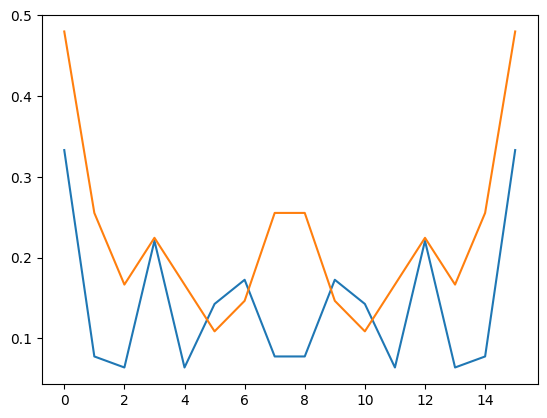

In [ ]:
plt.plot(np.exp(to_plot[0].detach()))

plt.plot(np.abs(vs[:, 0]))

In [ ]:
Hamiltonians[0].full_H().todense()

matrix([[-3., -1., -1.,  0., -1.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.],
        [-1., -1.,  0., -1.,  0., -1.,  0.,  0.,  0., -1.,  0.,  0.,  0.,
          0.,  0.,  0.],
        [-1.,  0.,  1., -1.,  0.,  0., -1.,  0.,  0.,  0., -1.,  0.,  0.,
          0.,  0.,  0.],
        [ 0., -1., -1., -1.,  0.,  0.,  0., -1.,  0.,  0.,  0., -1.,  0.,
          0.,  0.,  0.],
        [-1.,  0.,  0.,  0.,  1., -1., -1.,  0.,  0.,  0.,  0.,  0., -1.,
          0.,  0.,  0.],
        [ 0., -1.,  0.,  0., -1.,  3.,  0., -1.,  0.,  0.,  0.,  0.,  0.,
         -1.,  0.,  0.],
        [ 0.,  0., -1.,  0., -1.,  0.,  1., -1.,  0.,  0.,  0.,  0.,  0.,
          0., -1.,  0.],
        [ 0.,  0.,  0., -1.,  0., -1., -1., -1.,  0.,  0.,  0.,  0.,  0.,
          0.,  0., -1.],
        [-1.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1., -1., -1.,  0., -1.,
          0.,  0.,  0.],
        [ 0., -1.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  1.,  0., -1.,  0.,
         -1.,  0.,  0.],
        [ 

In [ ]:
ws, vs = np.linalg.eigh(Hamiltonians[0].full_H().todense())

In [ ]:
Hamiltonians[0]

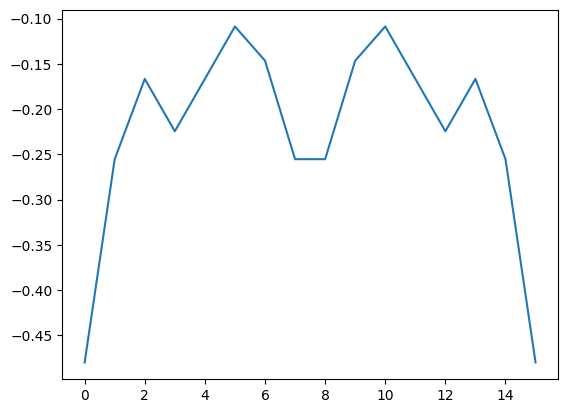

In [ ]:
plt.plot(vs[:, 0])

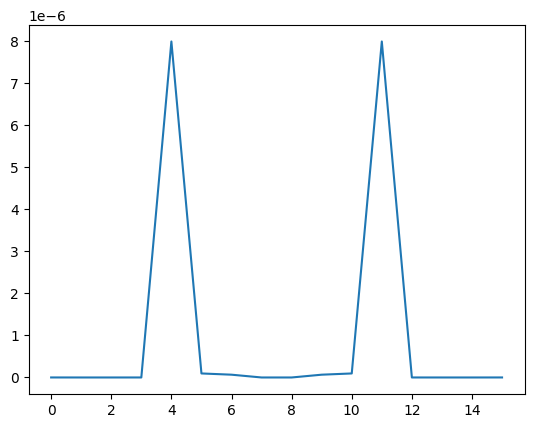

In [ ]:
plt.plot(np.exp(outs.detach().numpy()+outs.detach().numpy()[::-1]))